In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df1 = pd.read_csv('diabetes_null.csv')

In [5]:
df1 = df1.rename(columns={'DiabetesPedigreeFunction': 'DPF'})

In [6]:
df_copy = df1.copy(deep=True)

In [7]:
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure',
                                                                                    'SkinThickness', 'Insulin',
                                                                                    'BMI']].replace(0, np.NaN)


In [8]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [9]:
X = df_copy.drop(columns='Outcome')
y = df_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,6,148.0,72.0,35.0,71.0,33.6,0.627,5
1,1,85.0,66.0,29.0,71.0,26.6,0.351,31
2,8,183.0,64.0,27.0,71.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,11.0,76.0,48.0,18.0,32.9,0.171,63
764,2,122.0,7.0,27.0,71.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,3
766,1,126.0,6.0,27.0,71.0,3.1,0.349,47


In [ ]:
import pickle
pickle.dump(classifier, open('modelDIABETES.pkl','wb'))
model = pickle.load(open('modelDIABETES.pkl','rb'))

In [7]:
#diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,99.310616,55.706685,25.876155,105.659898,29.865654,0.490439,30.990885,0.348958
std,3.369578,55.115381,29.878852,12.967816,116.862508,10.686049,0.346050,13.281475,0.476951
min,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.100000,3.000000,0.000000
25%,1.000000,72.500000,16.000000,18.000000,21.000000,25.400000,0.253750,23.000000,0.000000
50%,3.000000,113.000000,66.000000,27.000000,71.000000,32.000000,0.382500,28.000000,0.000000
75%,6.000000,138.000000,76.000000,35.000000,151.000000,36.100000,0.647500,38.250000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.00000,3.0000,6.0000,17.00
Glucose,763.0,99.310616,55.115381,1.0,72.50000,113.0000,138.0000,199.00
BloodPressure,733.0,55.706685,29.878852,1.0,16.00000,66.0000,76.0000,122.00
SkinThickness,541.0,25.876155,12.967816,1.0,18.00000,27.0000,35.0000,99.00
Insulin,394.0,105.659898,116.862508,1.0,21.00000,71.0000,151.0000,846.00
BMI,757.0,29.865654,10.686049,2.0,25.40000,32.0000,36.1000,67.10
DiabetesPedigreeFunction,768.0,0.490439,0.346050,0.1,0.25375,0.3825,0.6475,2.42
Age,768.0,30.990885,13.281475,3.0,23.00000,28.0000,38.2500,81.00
Outcome,768.0,0.348958,0.476951,0.0,0.00000,0.0000,1.0000,1.00


In [9]:
#diabetes.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


In [10]:
#diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
"""diabetes_copy = diabetes.copy(deep=True)
print(diabetes_copy.isnull().sum())"""

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


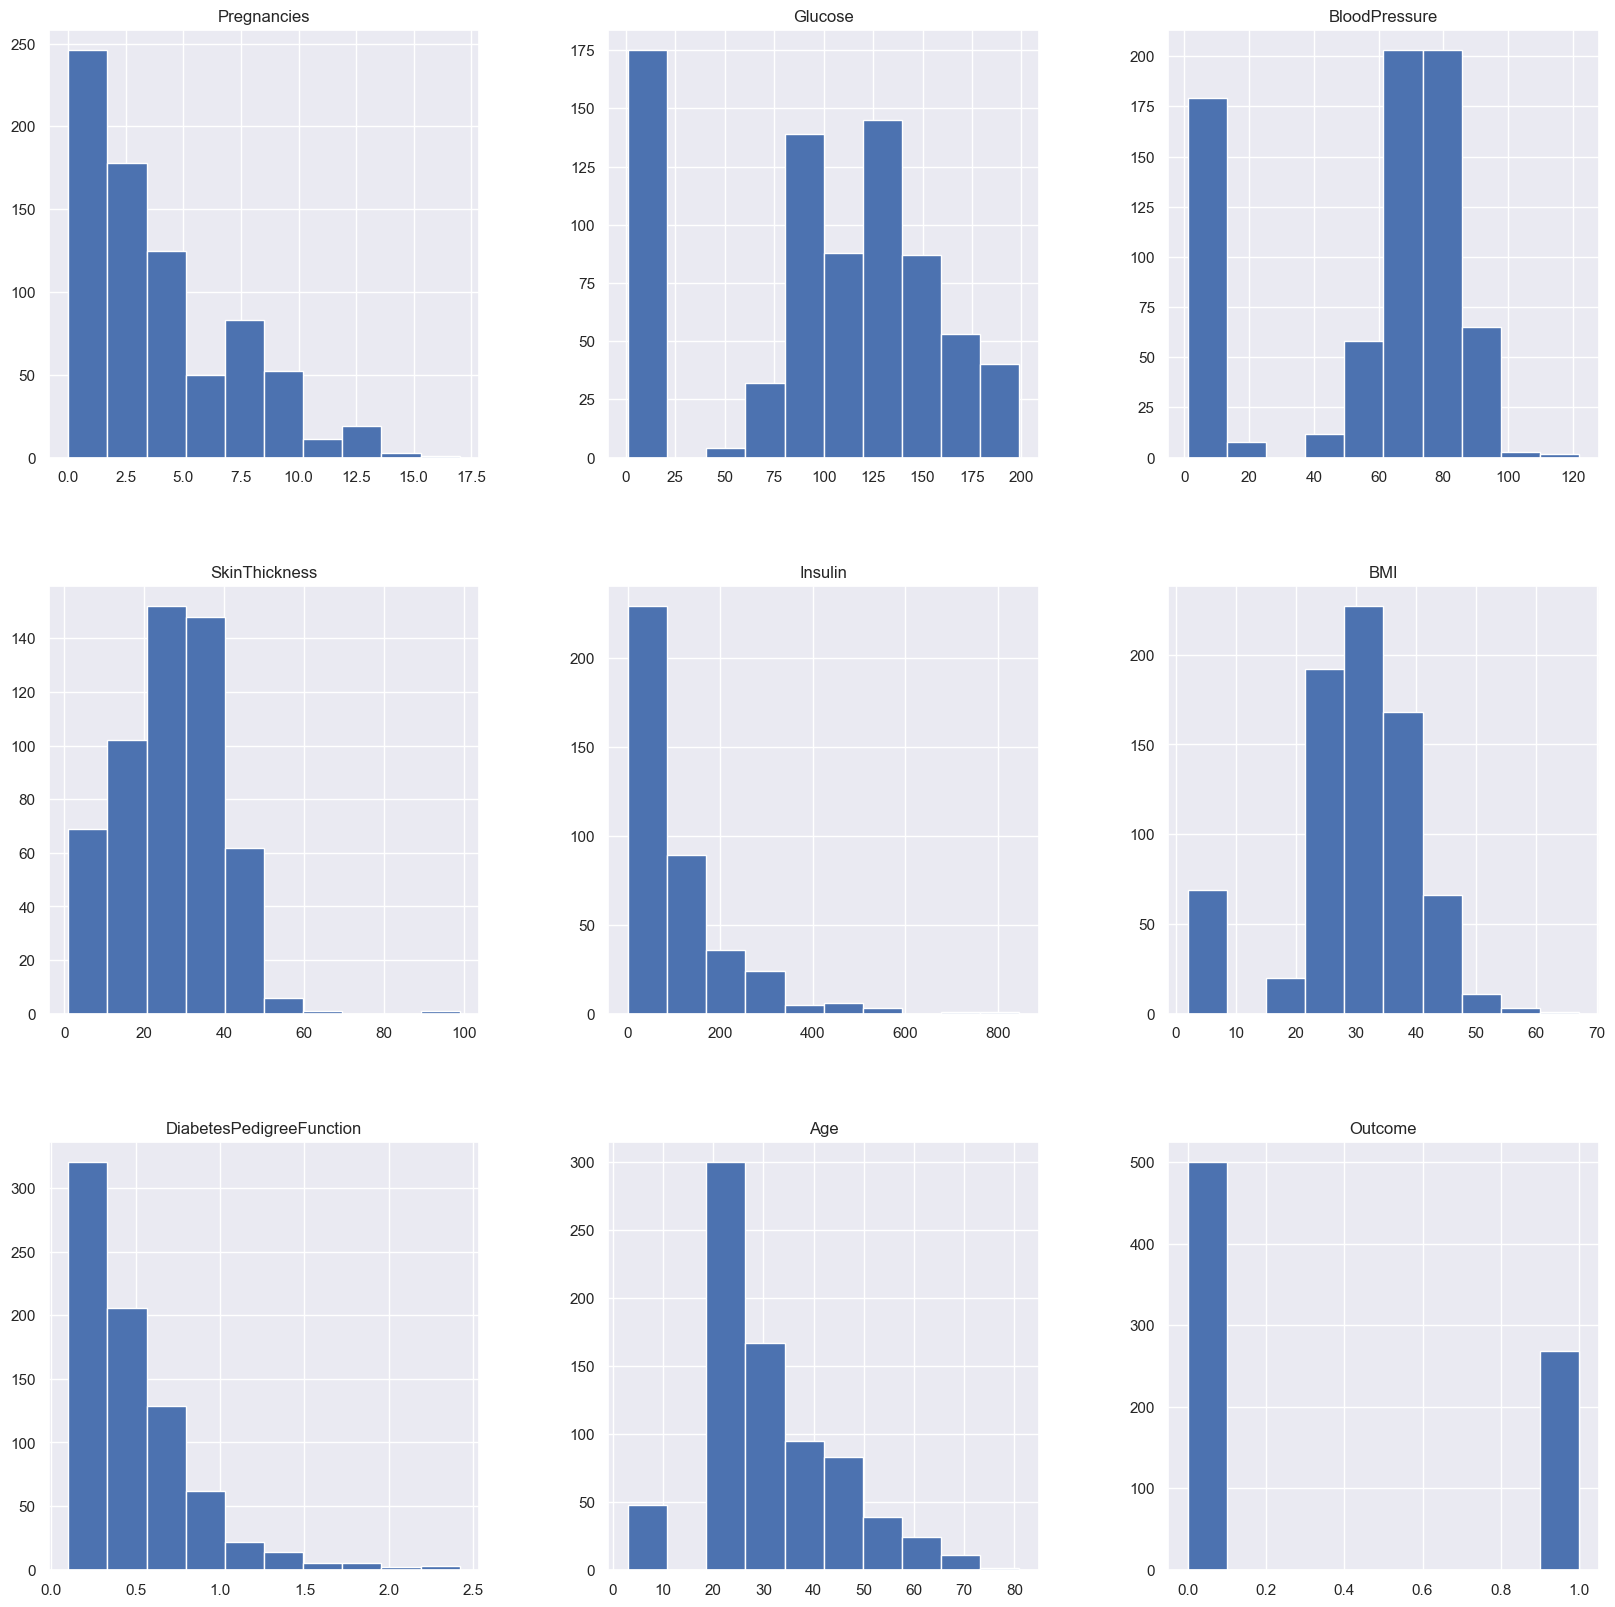

In [12]:
"""#plotting freq distribution matrix
p= diabetes.hist(figsize=(20,20))""""

In [13]:
"""diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace=True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace=True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace=True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace=True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace=True)""""

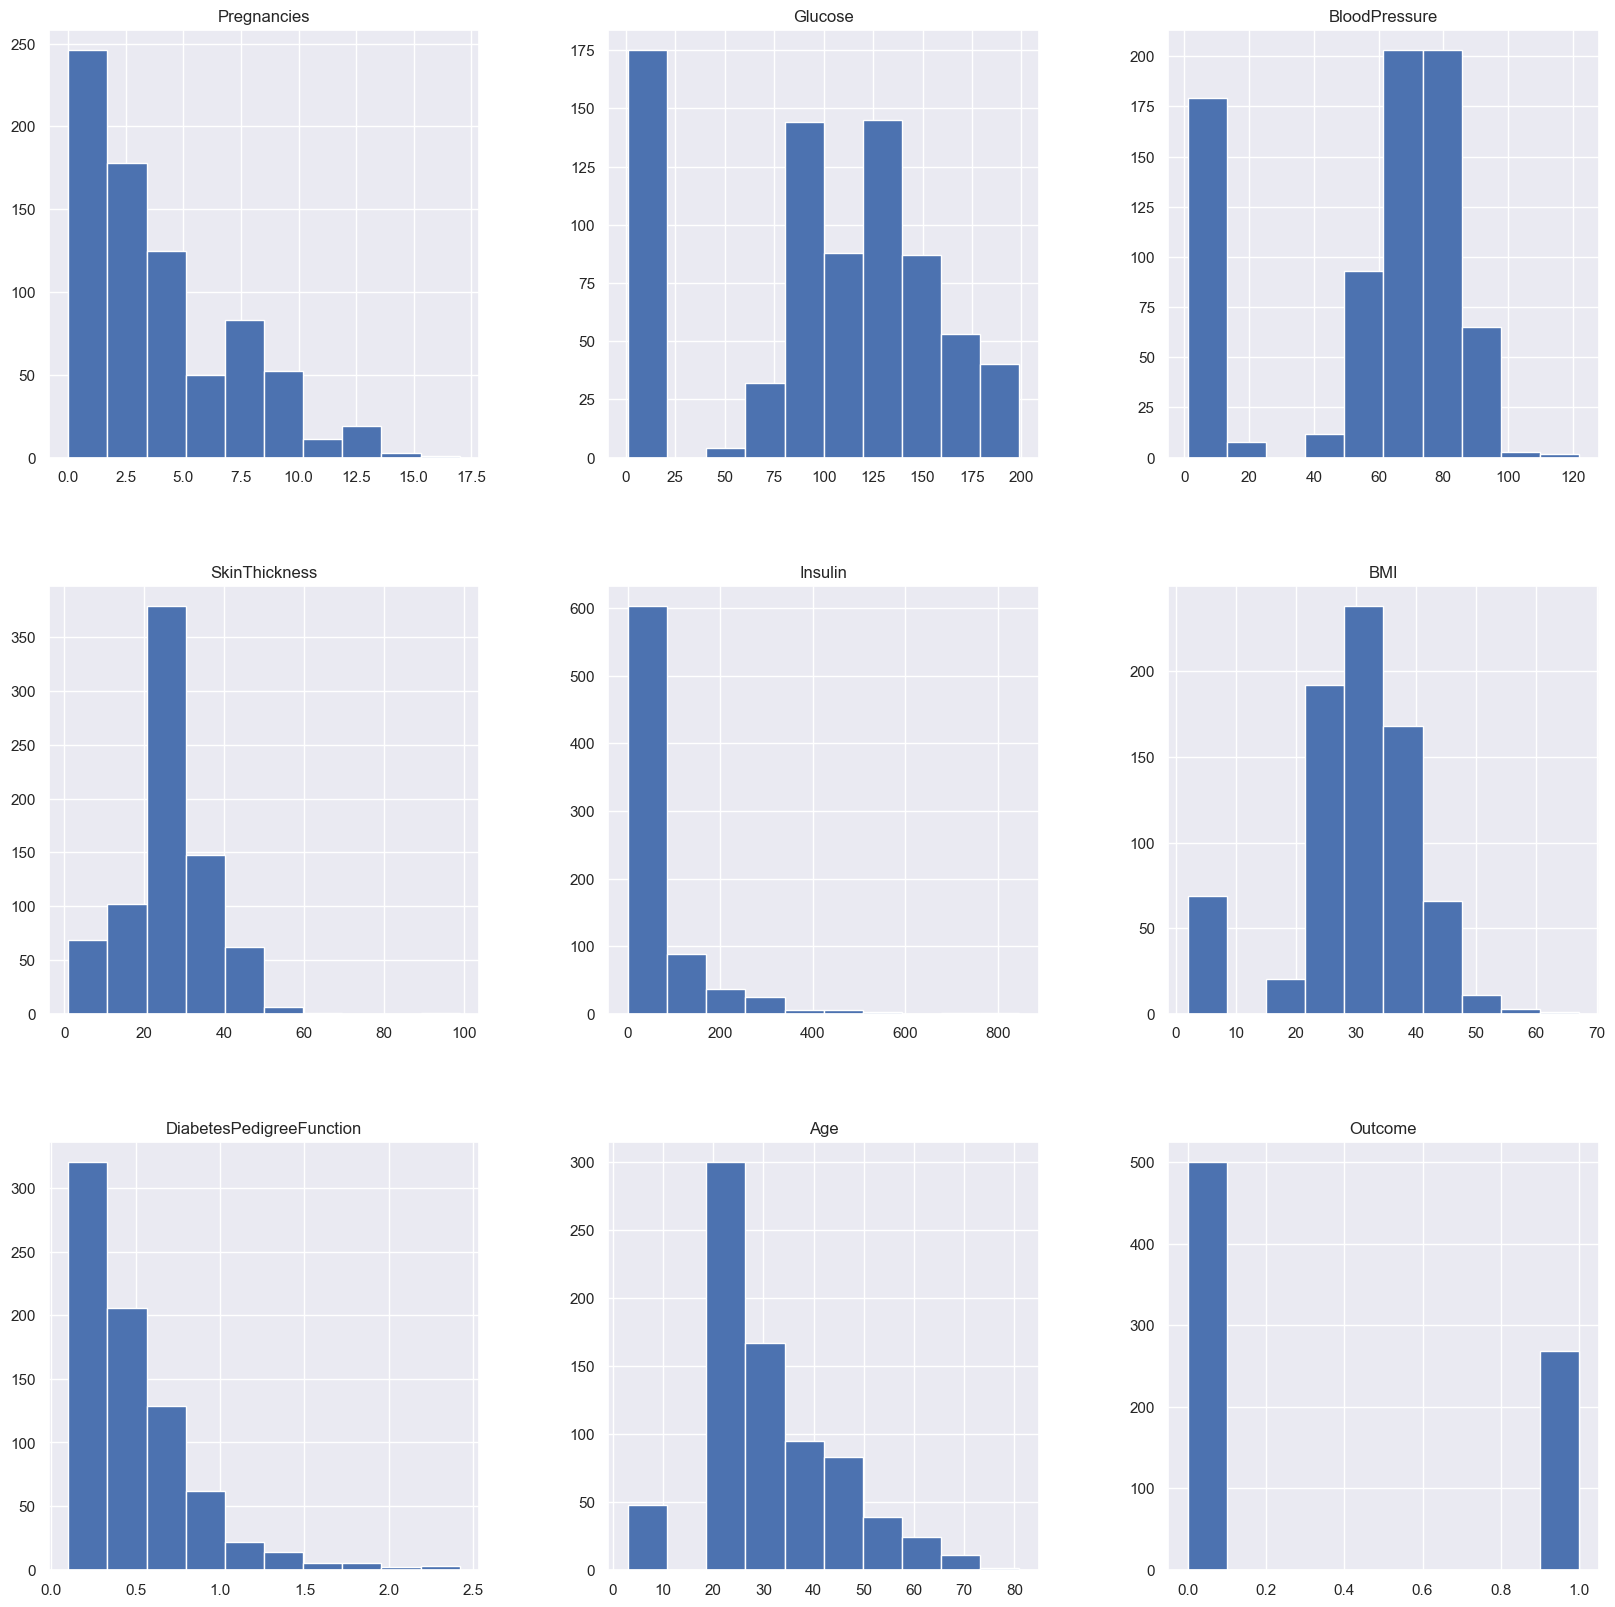

In [14]:
"""p=diabetes_copy.hist(figsize=(20,20))"""

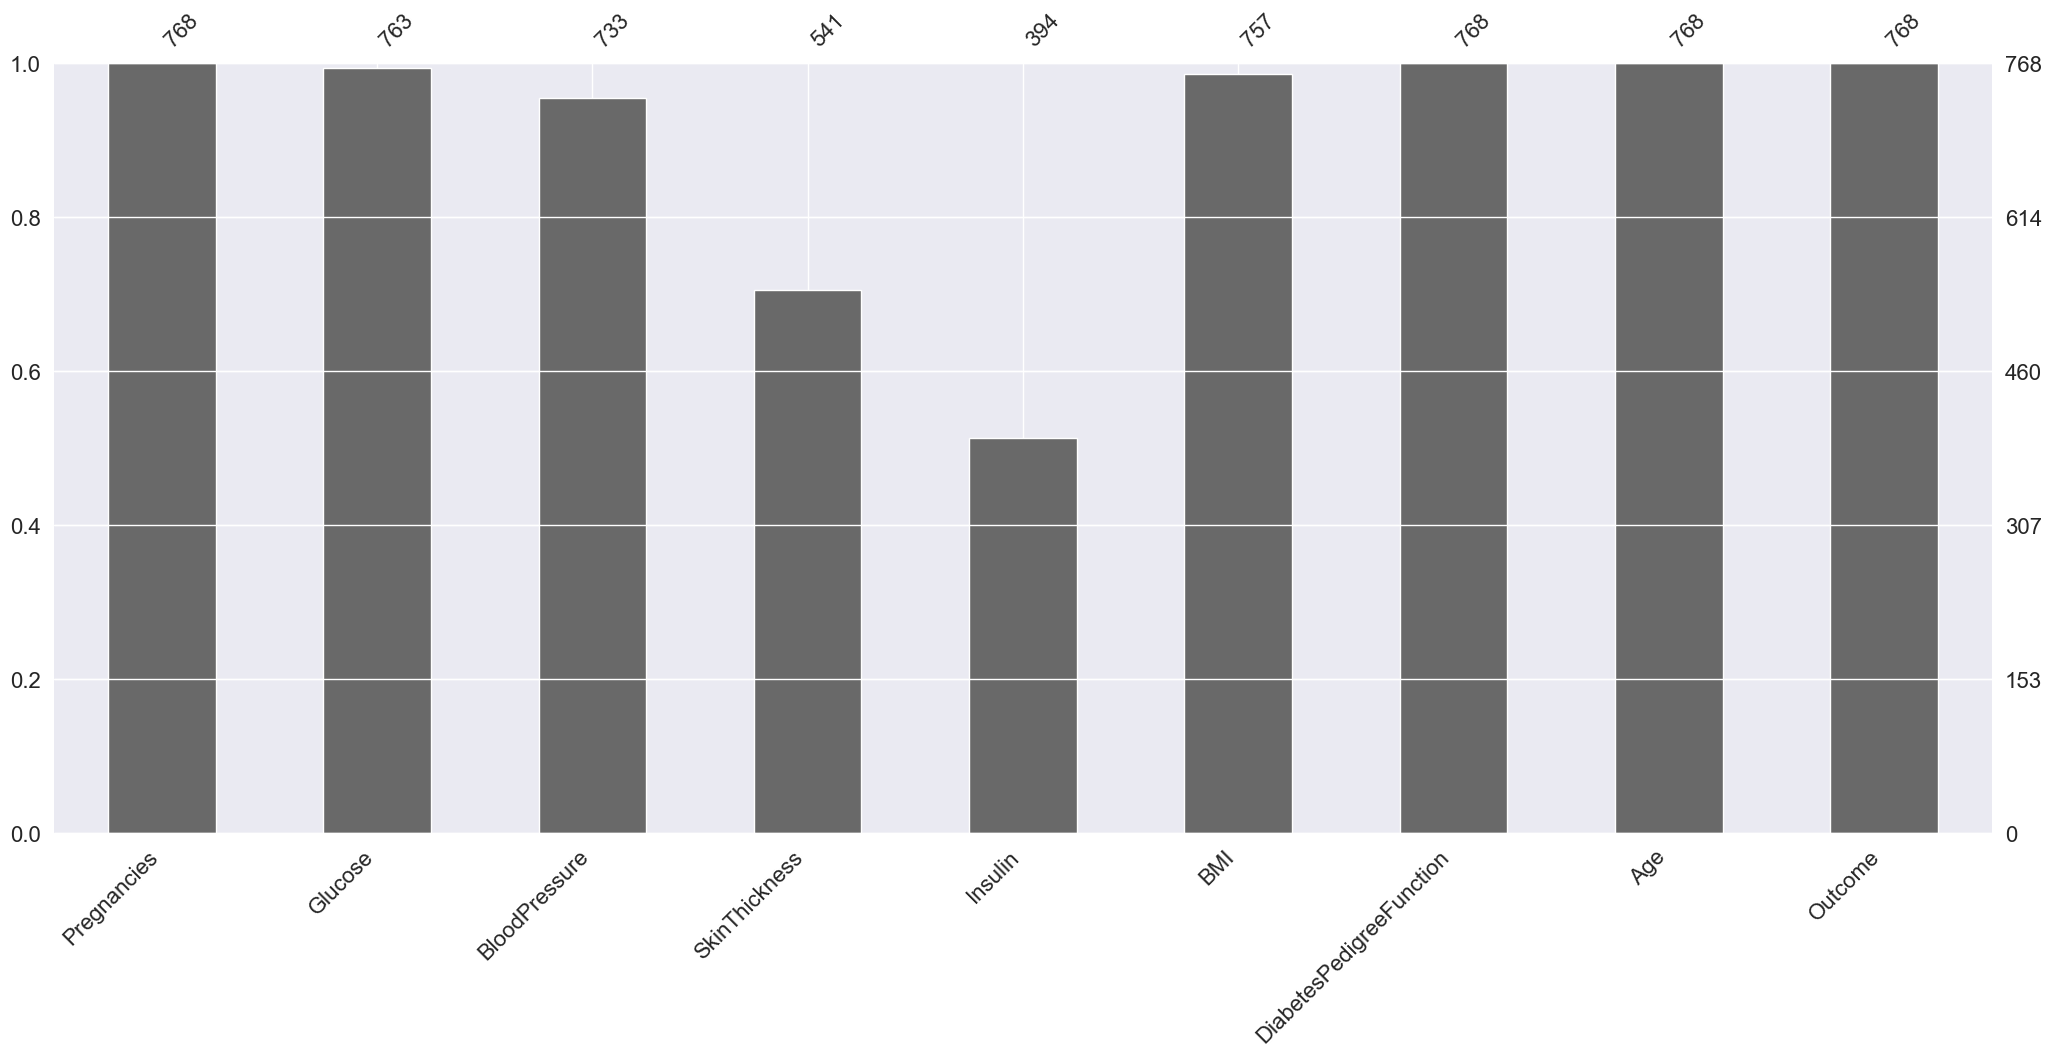

In [15]:
"""p=msno.bar(diabetes)"""

Outcome
0    500
1    268
Name: count, dtype: int64


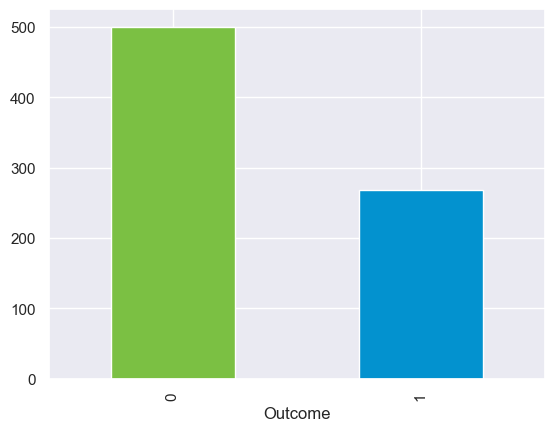

In [16]:
"""color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes["Outcome"].value_counts())
p = diabetes["Outcome"].value_counts().plot(kind="bar", color=colors)"""

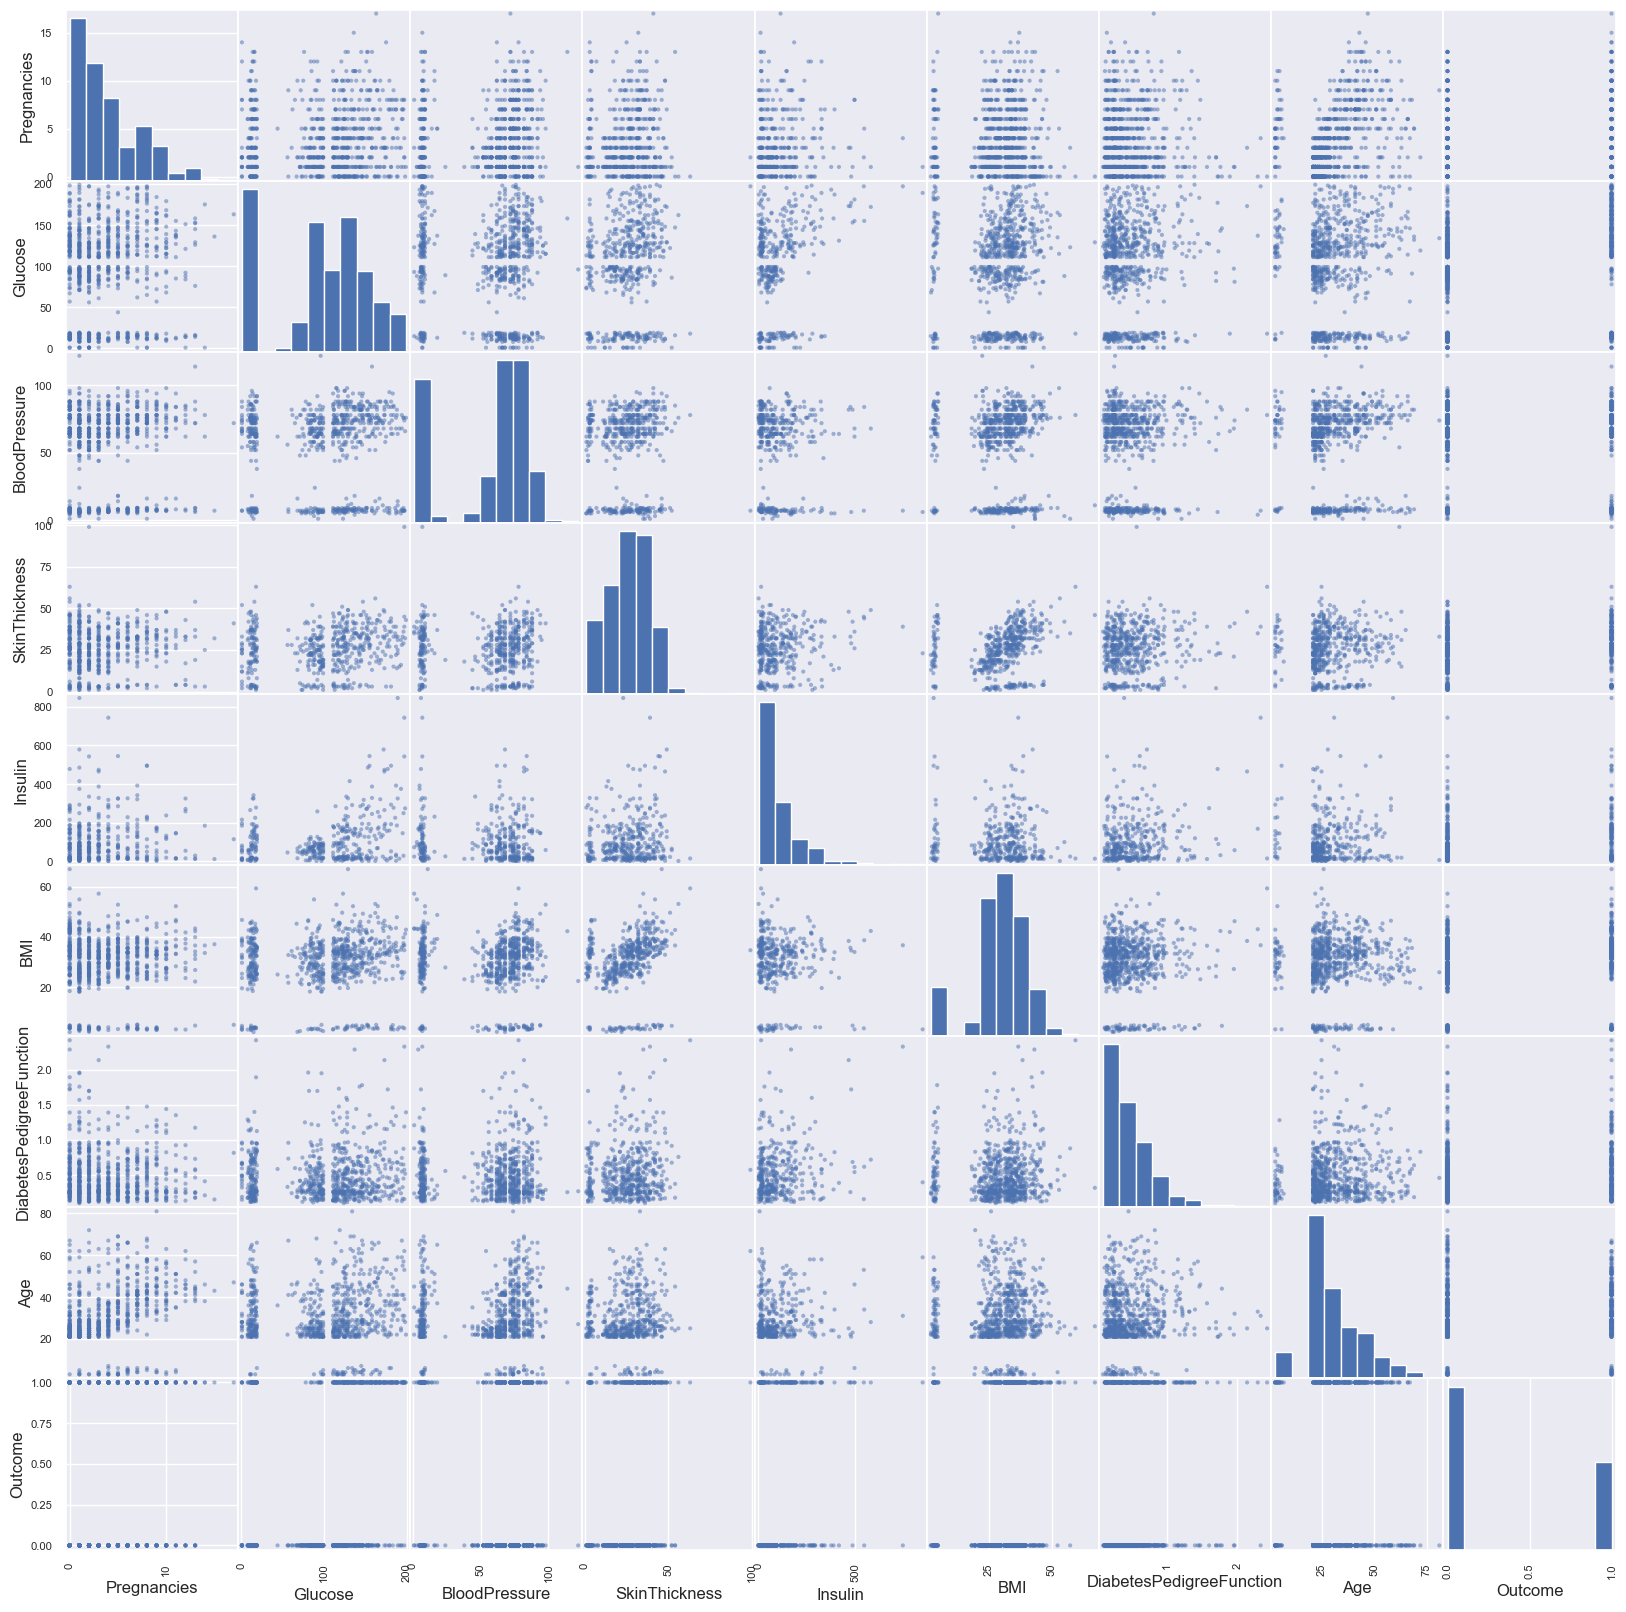

In [17]:
""""p=scatter_matrix(diabetes,figsize=(20,20))

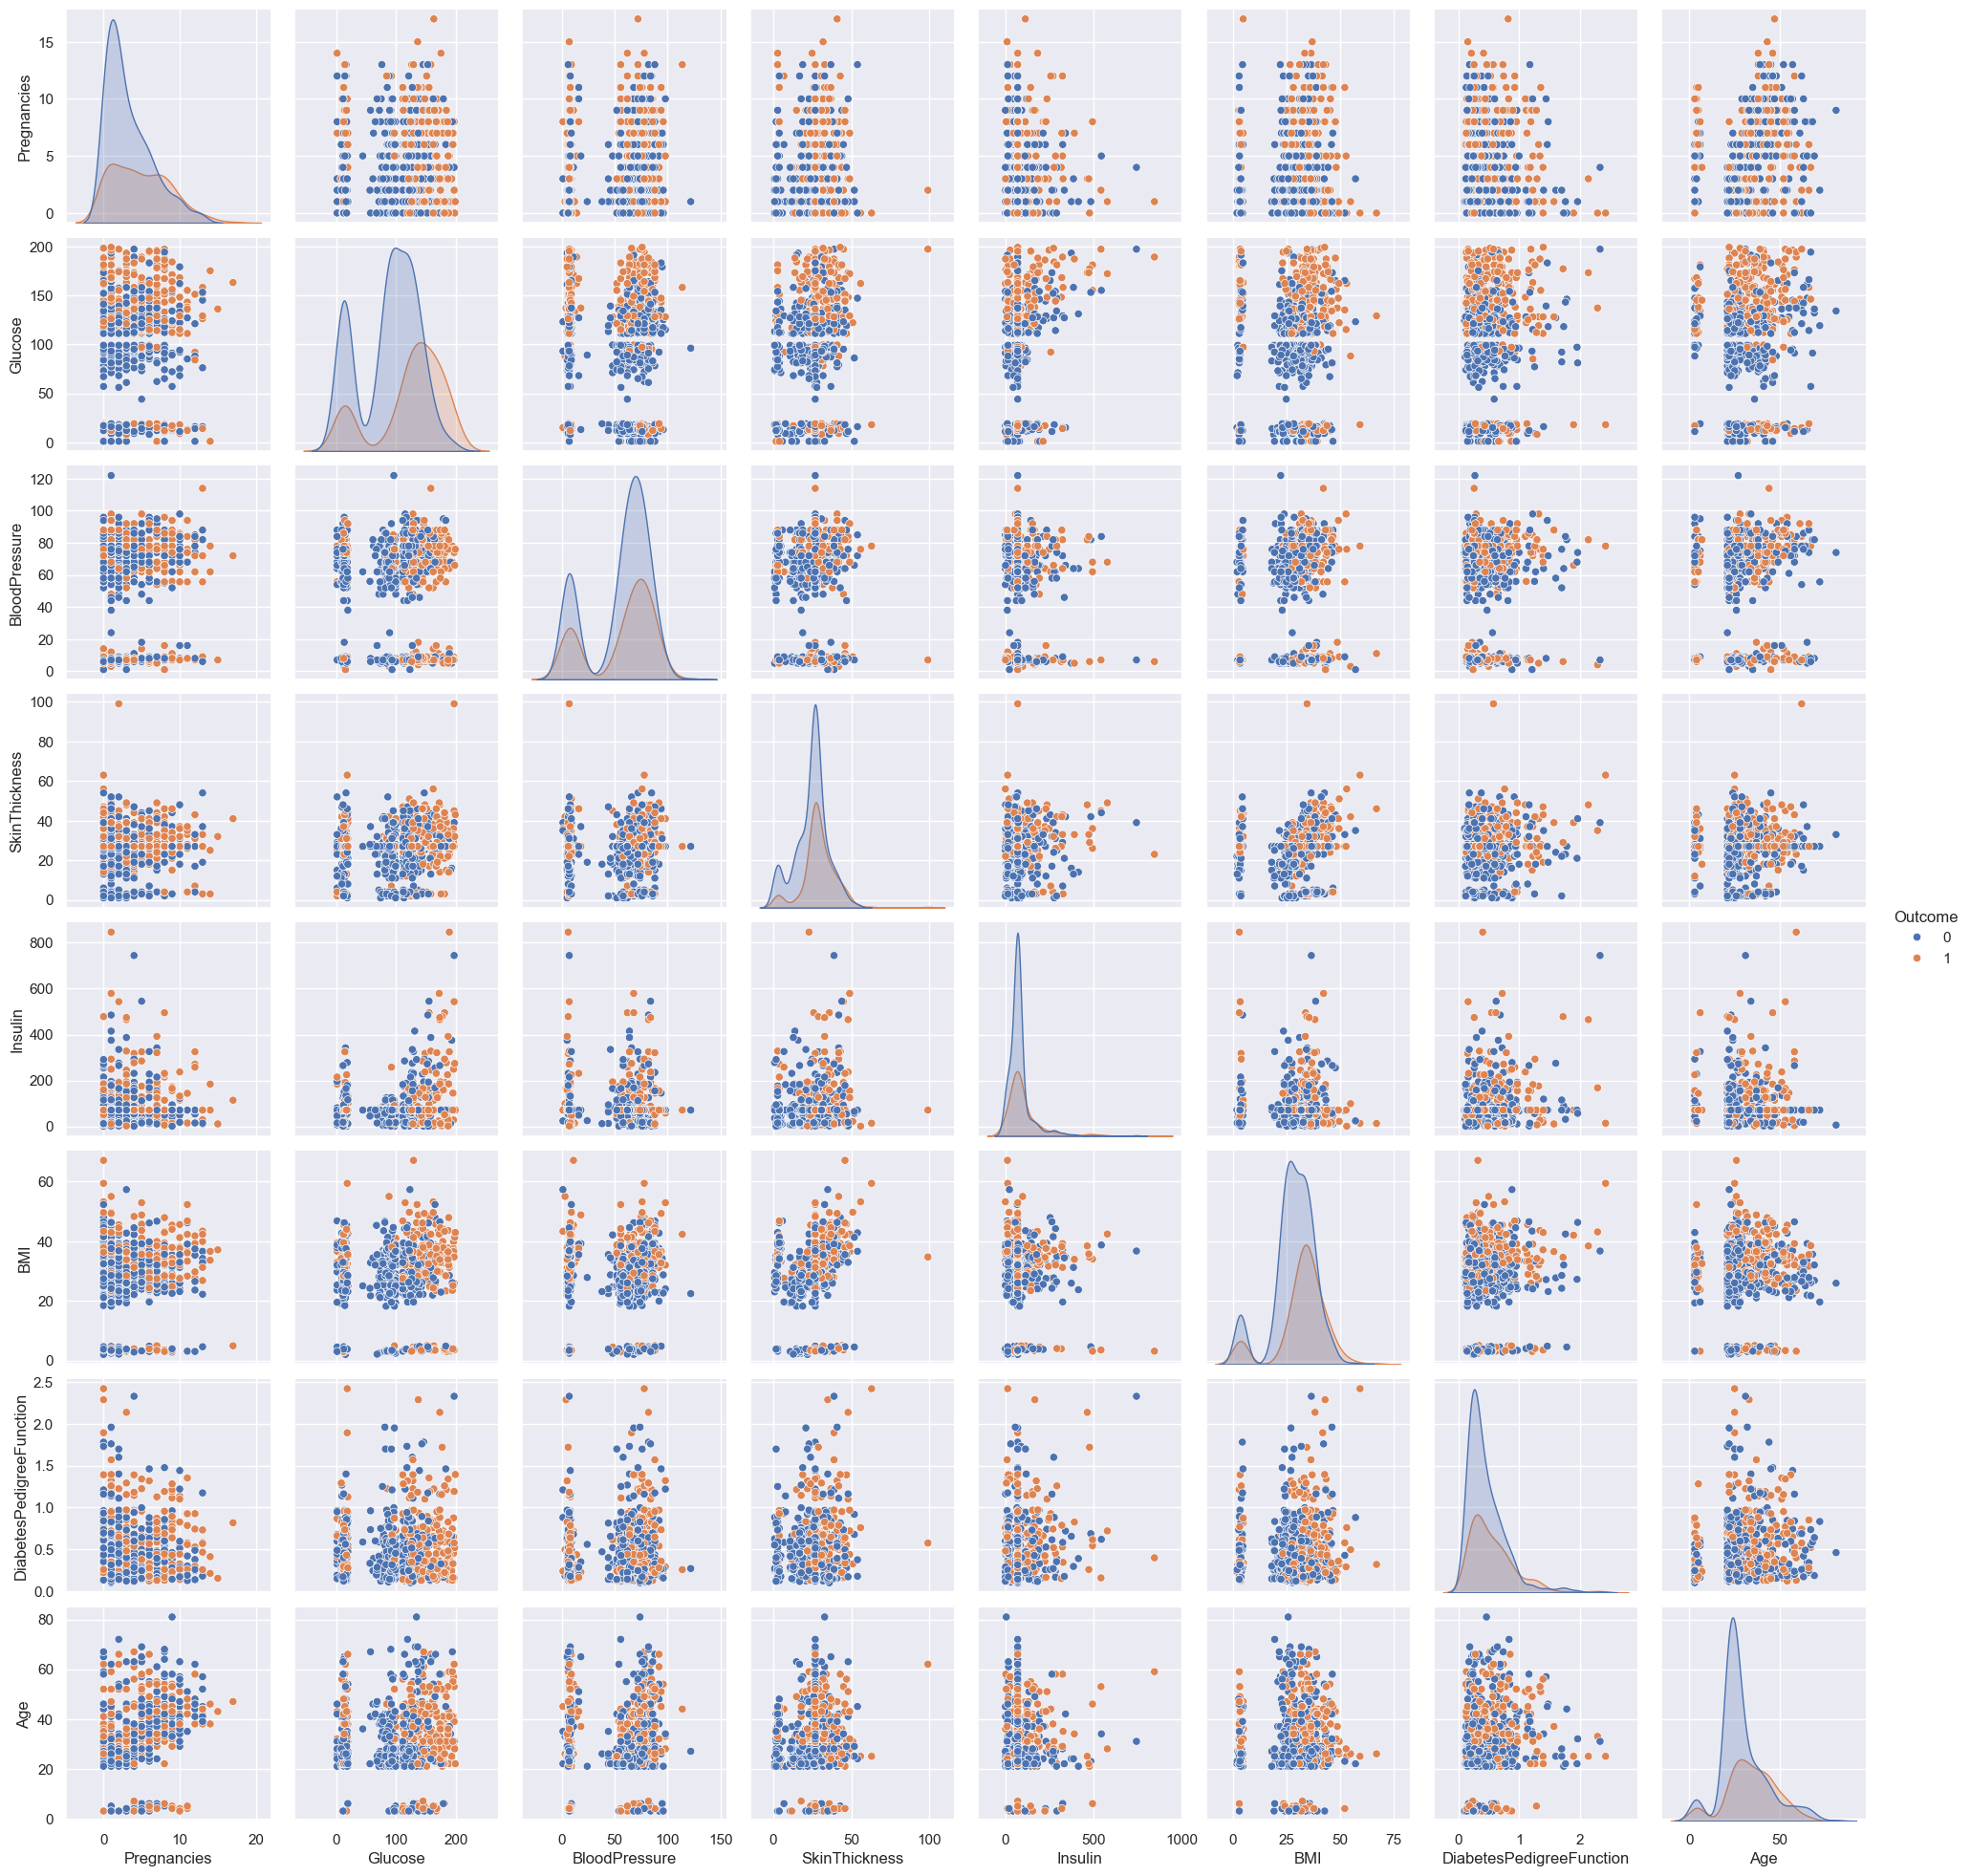

In [18]:
"""p=sns.pairplot(diabetes_copy,hue='Outcome')

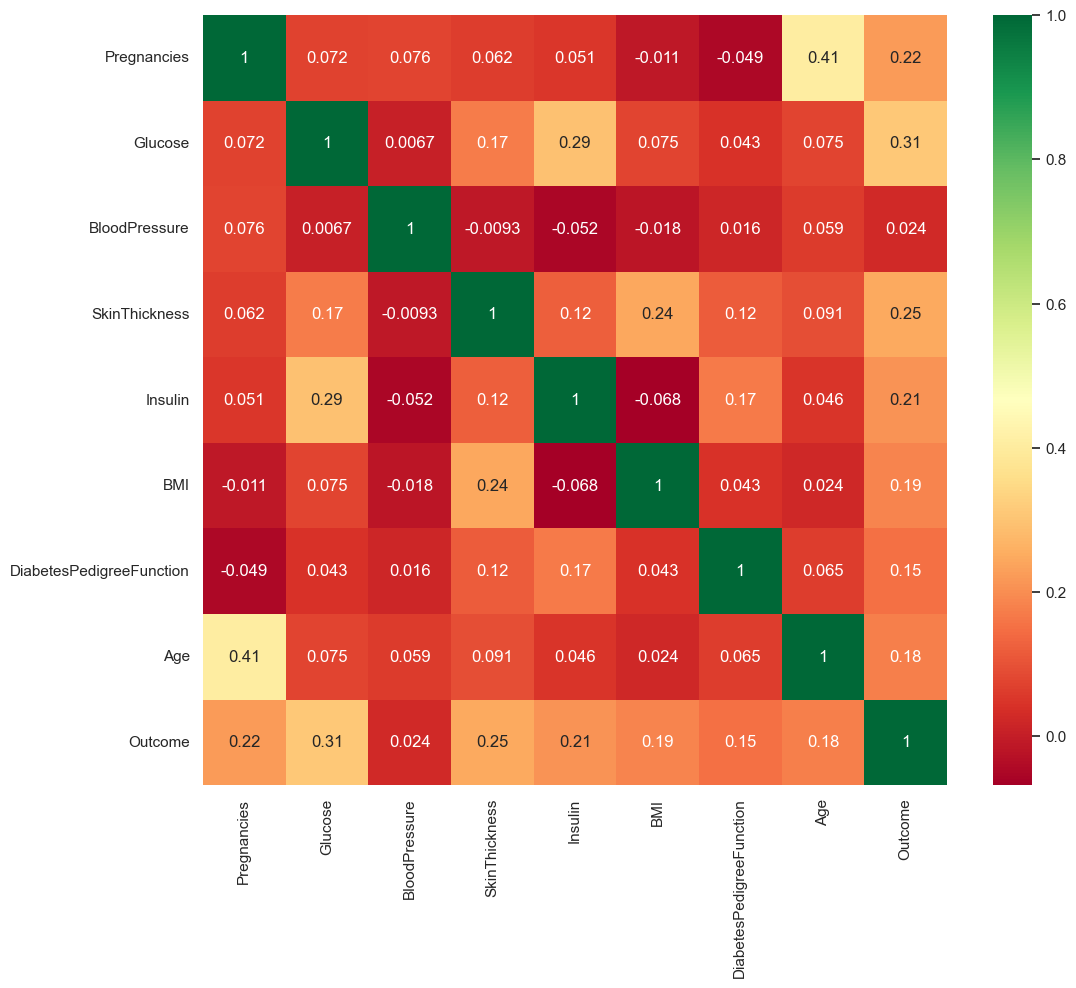

In [19]:
"""plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes.corr(),annot=True,cmap='RdYlGn')"""

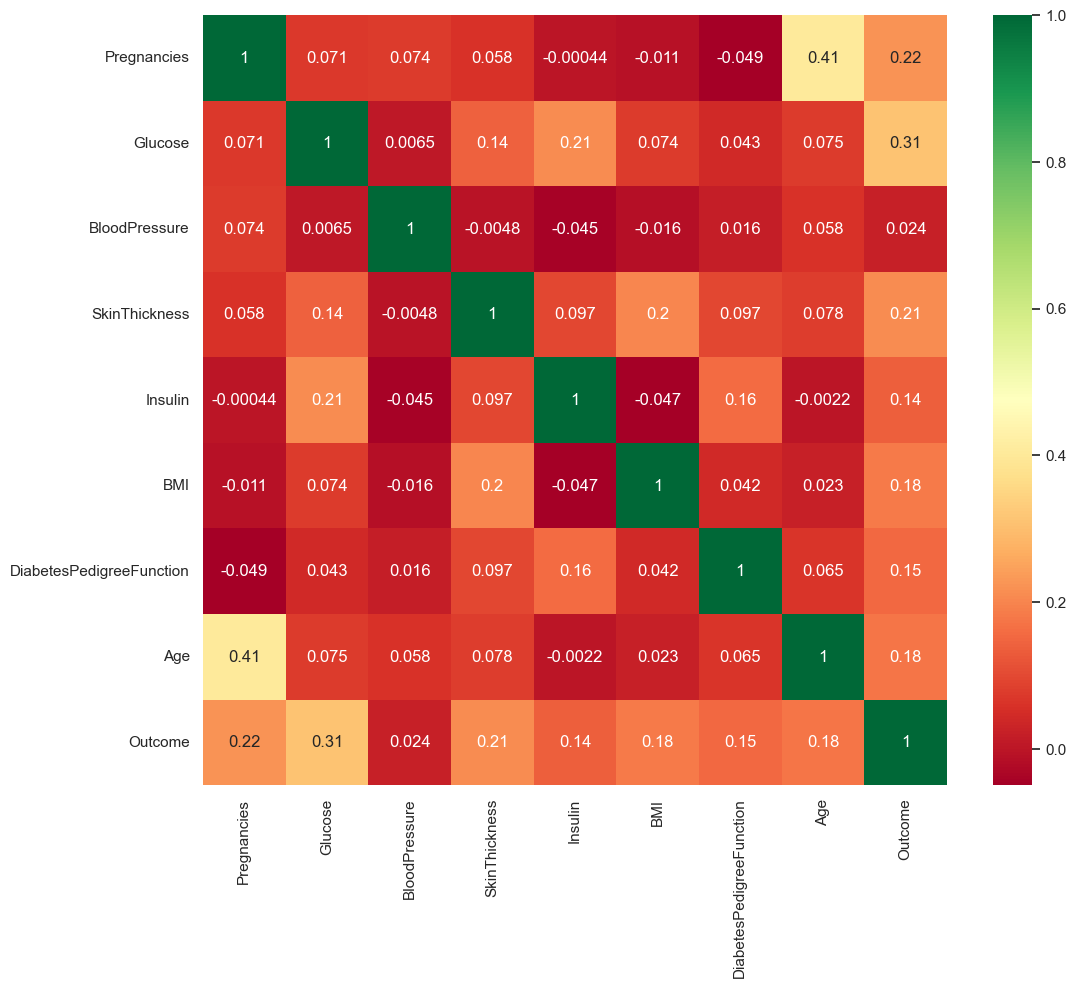

In [20]:
"""plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_copy.corr(),annot=True,cmap='RdYlGn')"""

In [21]:
"""diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,71.0,33.6,0.627,5,1
1,1,85.0,66.0,29.0,71.0,26.6,0.351,31,0
2,8,183.0,64.0,27.0,71.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [22]:
"""sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_copy.drop(["Outcome"], axis=1)), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()"""


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.886879,0.558561,0.807617,-0.208277,0.349239,0.394886,-1.958203
1,-0.844885,-0.260669,0.352871,0.256447,-0.208277,-0.310810,-0.403207,0.000687
2,1.233880,1.524406,0.284308,0.072724,-0.208277,-0.621976,0.525009,0.076029
3,-0.844885,-0.187808,0.352871,-0.294723,0.061129,-0.169371,-0.935268,-0.752732
4,-1.141852,0.686514,-1.772588,0.807617,0.927911,1.245020,5.197899,0.151371


In [23]:
"""y=diabetes_copy.Outcome"""

In [24]:
"""y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=42,stratify=y)

In [26]:
test_scores=[]
train_scores=[]
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test)) 

In [27]:
train_scores

[1.0,
 0.826171875,
 0.85546875,
 0.796875,
 0.814453125,
 0.775390625,
 0.771484375,
 0.759765625,
 0.763671875,
 0.74609375,
 0.759765625,
 0.751953125,
 0.75390625,
 0.751953125]

In [28]:
test_scores

[0.6953125,
 0.70703125,
 0.72265625,
 0.7109375,
 0.70703125,
 0.6953125,
 0.69921875,
 0.6875,
 0.703125,
 0.6875,
 0.6953125,
 0.69921875,
 0.70703125,
 0.67578125]

In [29]:
#max_train_score = max(train_scores)
#train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
#print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x+1, train_scores_ind))))
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x+1, train_scores_ind))))


Max train score 100.0 % and k = [1]


In [30]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x+1, test_scores_ind))))


Max test score 72.265625 % and k = [3]


[]

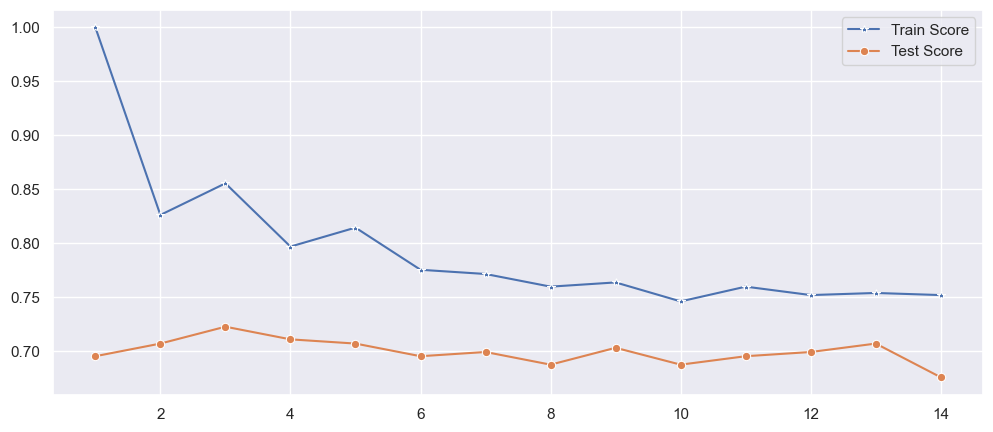

In [31]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.plot()

In [33]:
knn = KNeighborsClassifier(i)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.67578125

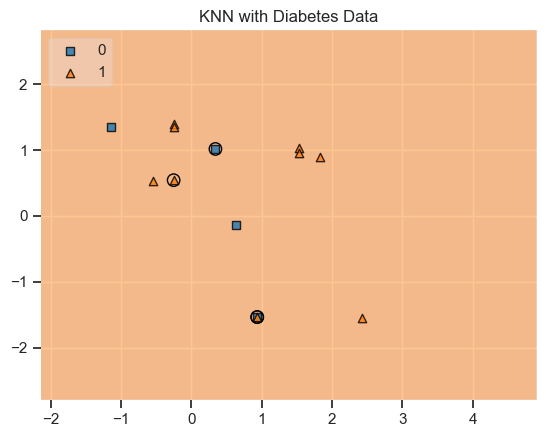

In [37]:
value = 20000
width = 20000

plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()


Text(0.5, 20.049999999999997, 'Predicted label')

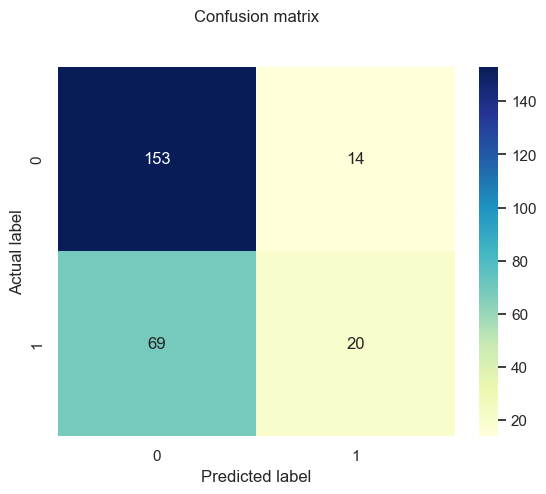

In [38]:
y_pred= knn.predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu" , fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')  
plt.xlabel('Predicted label')

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       167
           1       0.59      0.22      0.33        89

    accuracy                           0.68       256
   macro avg       0.64      0.57      0.56       256
weighted avg       0.65      0.68      0.63       256



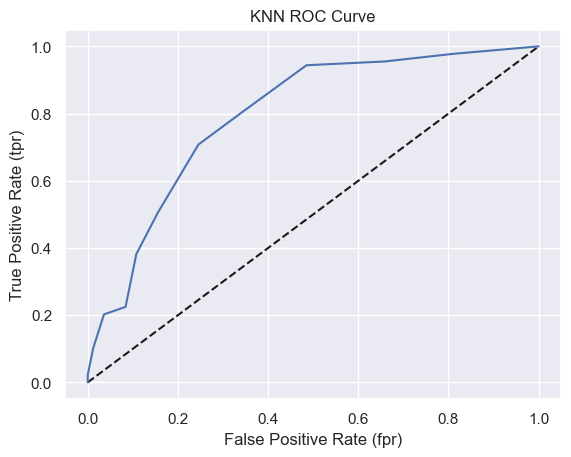

In [45]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Knn')  # Corrected from fnr to fpr
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('KNN ROC Curve')
plt.show()


In [46]:
roc_auc_score(y_test,y_pred_proba)

0.7945233129247123

In [52]:
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters" + str(knn_cv.best_params_))

Best Score:0.7239368474662593
Best Parameters{'n_neighbors': 47}
